# SMS Spam Collection v.1
-------------------------

1. DESCRIPTION
--------------

The SMS Spam Collection v.1 (hereafter the corpus) is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam. 

1.1. Compilation
----------------

This corpus has been collected from free or free for research sources at the Web:

- A collection of between 425 SMS spam messages extracted manually from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: http://www.grumbletext.co.uk/
- A list of 450 SMS ham messages collected from Caroline Tag's PhD Theses available at http://etheses.bham.ac.uk/253/1/Tagg09PhD.pdf
- A subset of 3,375 SMS ham messages of the NUS SMS Corpus (NSC), which is a corpus of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. The NUS SMS Corpus is avalaible at: http://www.comp.nus.edu.sg/~rpnlpir/downloads/corpora/smsCorpus/
- The amount of 1,002 SMS ham messages and 322 spam messages extracted from the SMS Spam Corpus v.0.1 Big created by José María Gómez Hidalgo and public available at: http://www.esp.uem.es/jmgomez/smsspamcorpus/


1.2. Statistics
---------------

There is one collection:

- The SMS Spam Collection v.1 (text file: smsspamcollection) has a total of 4,827 SMS legitimate messages (86.6%) and a total of 747 (13.4%) spam messages.


1.3. Format
-----------

The files contain one message per line. Each line is composed by two columns: one with label (ham or spam) and other with the raw text. Here are some examples:

ham   What you doing?how are you?
ham   Ok lar... Joking wif u oni...
ham   dun say so early hor... U c already then say...
ham   MY NO. IN LUTON 0125698789 RING ME IF UR AROUND! H*
ham   Siva is in hostel aha:-.
ham   Cos i was out shopping wif darren jus now n i called him 2 ask wat present he wan lor. Then he started guessing who i was wif n he finally guessed darren lor.
spam   FreeMsg: Txt: CALL to No: 86888 & claim your reward of 3 hours talk time to use from your phone now! ubscribe6GBP/ mnth inc 3hrs 16 stop?txtStop
spam   Sunshine Quiz! Win a super Sony DVD recorder if you canname the capital of Australia? Text MQUIZ to 82277. B
spam   URGENT! Your Mobile No 07808726822 was awarded a L2,000 Bonus Caller Prize on 02/09/03! This is our 2nd attempt to contact YOU! Call 0871-872-9758 BOX95QU

Note: messages are not chronologically sorted.

In [1]:
# importing libraries and the Dataset
import pandas as pd
import re
import nltk
import numpy as np
import matplotlib.pyplot as plt

messages = pd.read_csv('spam.csv',encoding='latin-1')

messages.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

messages.columns = ['label','message']

In [2]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


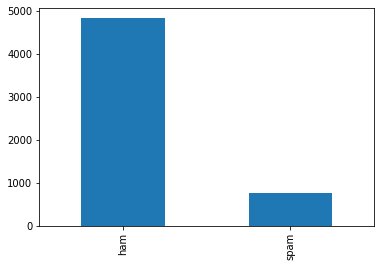

In [3]:
messages['label'].value_counts().plot(kind='bar')

In [4]:
#Data cleaning and preprocessing
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()
    review = [lem.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    

In [5]:
# Creating the Bag of Words model where 0= ham and 1= spam
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()
y=pd.get_dummies(messages['label'])
y=y.iloc[:,1].values

In [6]:
# Creating the TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=2500)
X1 = tfidf.fit_transform(corpus).toarray()
y1=pd.get_dummies(messages['label'])
y1=y1.iloc[:,1].values

### Model for Bag of words

In [7]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

y_pred=spam_detect_model.predict(X_test)
spam_detect_model.score(X_test,y_test)

0.9847533632286996

In [8]:
from nltk.tokenize import word_tokenize
review= 'Free entry in 2 a wkly comp to win FA Cup '
review= re.sub('[^a-zA-Z]',' ',review) # Replacing anything except character with space
review= review.lower() # converting to lower
review= word_tokenize(review) # Tokensizing to get all words
review= [lem.lemmatize(x) for x in review if x not in set(stopwords.words('english'))] # Leammatizing
review= [' '.join(review)]
spam_detect_model.predict(CountVectorizer(max_features=2500).fit(corpus).transform(review).toarray())

array([1], dtype=uint8)

### Model for Tf-IDF

In [9]:

# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.20, random_state = 0)

# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

y_pred=spam_detect_model.predict(X_test)
spam_detect_model.score(X_test,y_test)

0.9748878923766816

In [10]:
review= 'No calls..messages..missed calls '
review= re.sub('[^a-zA-Z]',' ',review) # Replacing anything except character with space
review= review.lower() # converting to lower
review= word_tokenize(review) # Tokensizing to get all words
review= [lem.lemmatize(x) for x in review if x not in set(stopwords.words('english'))] # Leammatizing
review= [' '.join(review)]
spam_detect_model.predict(TfidfVectorizer(max_features=2500).fit(corpus).transform(review).toarray())

array([0], dtype=uint8)

In [11]:
from sklearn.metrics import roc_auc_score,precision_score,recall_score,f1_score,accuracy_score
print('Roc_AUC: {}, Precision: {}, Recall:{}, F1:{}, Accuracy:{}'.format(
roc_auc_score(y_test,spam_detect_model.predict(X_test)),
precision_score(y_test,spam_detect_model.predict(X_test)),
recall_score(y_test,spam_detect_model.predict(X_test)),
f1_score(y_test,spam_detect_model.predict(X_test)),
accuracy_score(y_test,spam_detect_model.predict(X_test))))

Roc_AUC: 0.9156626506024097, Precision: 1.0, Recall:0.8313253012048193, F1:0.9078947368421052, Accuracy:0.9748878923766816
